# **Multi Layer Perceptron**

In [ ]:
#import libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load dataset
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Converting categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = data.drop('tip', axis=1)
y = data['tip']


In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics= ['mae'])

In [ ]:
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 13.4890 - mae: 3.3373
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.3230 - mae: 2.8871 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5048 - mae: 2.5877 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.2557 - mae: 2.2159 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3602 - mae: 1.9253 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1322 - mae: 1.6255 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8591 - mae: 1.2865 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2433 - mae: 1.1081 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6912 - mae: 0.9050 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4835 - mae: 0.8829 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7299 - mae: 0.9407 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4446 - mae: 0.9036 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [ ]:
# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error: ", loss[0])

Mean Squared Error:  1.0813207626342773


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


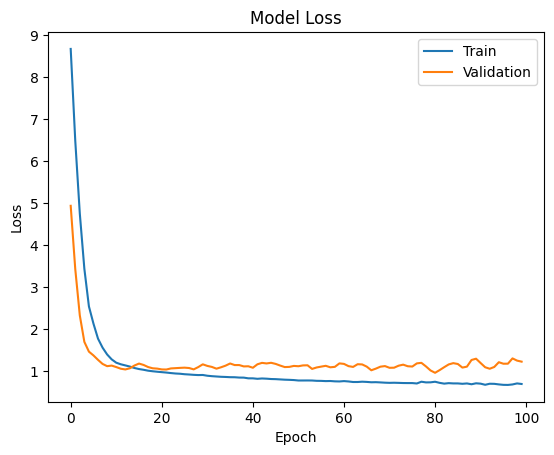

In [ ]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #Input Layer
    tf.keras.layers.Dense(32, activation='relu'), #Hidden Layer
    tf.keras.layers.Dense(1) #Output Layer
])


# Compile the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

#train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data= (X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)

# Plotting the training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

## Call Back Functions

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 13.2516 - val_loss: 7.2760
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.5393 - val_loss: 5.4134
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7146 - val_loss: 3.9787
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8296 - val_loss: 2.8410
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7071 - val_loss: 1.9925
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.4441 - val_loss: 1.4300
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.7962 - val_loss: 1.1391
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2775 - val_loss: 1.0547
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5903 - val_loss: 1.0835
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3576 - val_loss: 1.1383
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.5179 - val_loss: 1.1595
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7475 - val_los

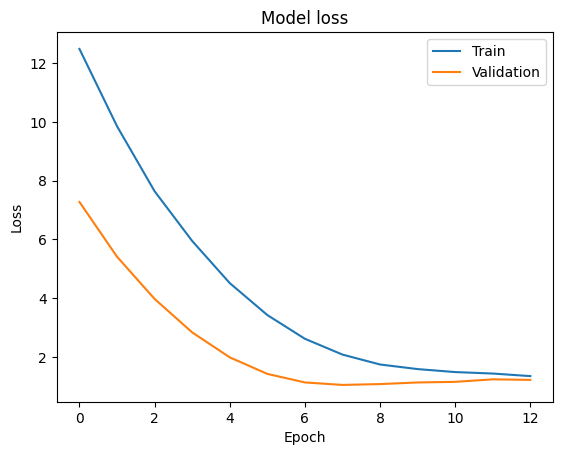

In [ ]:
#import library
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), #Input layer
    tf.keras.layers.Dense(32, activation='relu'), #Hidden layer
    tf.keras.layers.Dense(1) #Output layer
    ])

#compiling the model
model.compile(optimizer='adam', loss= 'mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model
loss = model.evaluate(X_test, y_test, verbose=0)

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()